In [1]:
# Importing numpy & pandas
import numpy as np
import pandas as pd

# Importing matplotlib & seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.shape

(5000, 14)

In [5]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Understanding of each attribute or feature in the given data

There are **5000** records with **14** attributes/features.

**ID :** Customer ID doesn't add any significant information & it's a redundant attribute. There is no association/correlation between Customer ID & Personal Loan (Target Variable).  We can safely ignore this attribute for model prediction.

**Age :** Customer Age will have impact on the Personal Loan amount.

**Experience :** Professional experience of a customer will also have an impact on the Personal Loan amount.

**Income :** Personal Loan amount offered will be directly proportional to Income of a customer.

**ZIP Code :** From the given dataset, not much inference can be drawn from the Home Address ZIP code. It's difficult to correlate ZIP Code & Personal Loan from the given dataset. If we had another (external) dataset to map ZIP code with cities or states, we could have drawn some inference.

   So in our model building we can drop the ZIP Code feature.
   
**Family :** Family size may impact Personal Loan. We can include this feature.

**CCAvg :** Average spending on credit cards may also impact Personal Loan. We can include this feature.

**Education :** Higher education of a customer may yield higher Income, thus Education may have affect the Personal Loan amount.

**Mortage, Securities Account, CD Account, Online, CreditCard :** These attributes may also affect Personal Loan feature, but only the detailed study of data distribution in each attribute will reveal something.

**Personal Loan :** Did this customer accept the personal loan offered in the last campaign? **This is our target variable**

### Data distribution in each attribute

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
print("Number of missing/null values : \n",data.isnull().sum())

Number of missing/null values : 
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [8]:
#finding unique data
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
# Checking if there are any negative values
data.lt(0).sum()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [11]:
print("There are %d records with negative experience. Before proceeding any further we need to clean the same"% 
      data.Experience.lt(0).sum() )

There are 52 records with negative experience. Before proceeding any further we need to clean the same


In [12]:
#clean the negative variable
PosExp = data.loc[data['Experience'] >=0]
NegExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[NegExp]['ID'].tolist() # getting the customer ID who has negative experience

In [13]:
# there are 52 records with negative experience
NegExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [14]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = PosExp[(PosExp.Age == age) & (PosExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [15]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4988.0,20.171411,11.405873,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Data distribution in each attribute and Findings

In [17]:
# Not considering ID for finding data distribution as it doesn't make any sense.

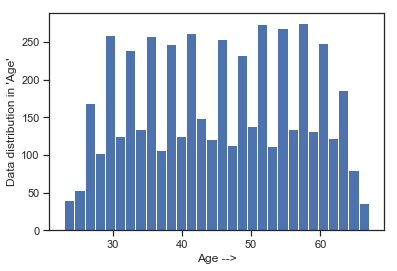

In [18]:
# Data distribution in 'Age'
plt.xlabel("Age -->")
plt.ylabel("Data distribution in 'Age'")
plt.hist(data['Age'], bins=30)
plt.show()

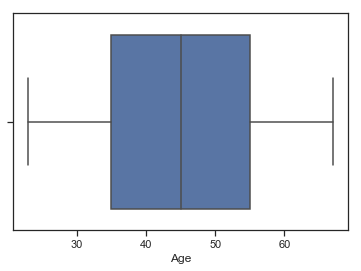

In [19]:
sns.boxplot(data['Age'])

#### Findings : There are customers with all age groups. There is no skewness.
#### People in the age group of 30-60 year were predominately targeted.(uniform distibution)

C:\Users\veeresh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\veeresh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


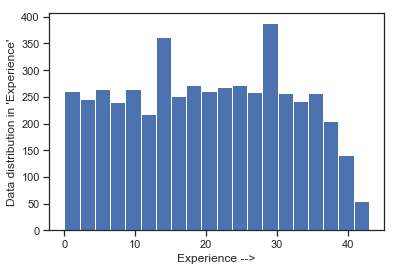

In [20]:
# Data distribution in 'Experience'
plt.xlabel("Experience -->")
plt.ylabel("Data distribution in 'Experience'")
plt.hist(data['Experience'], bins=20)
plt.show()

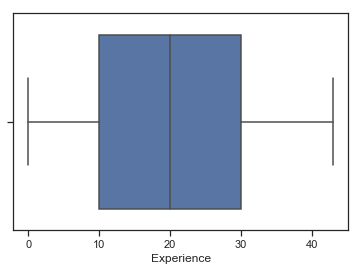

In [21]:
sns.boxplot(data['Experience'])

#### Findings : Customers with wide range of experiences (0-35 years) were predominately targeted (uniform distibution)

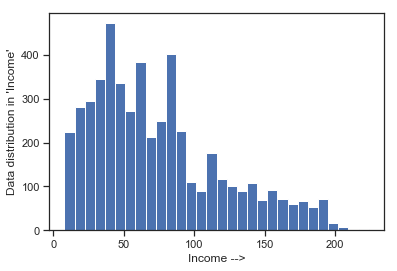

In [22]:
# Data distribution in 'Income'
plt.xlabel("Income -->")
plt.ylabel("Data distribution in 'Income'")
plt.hist(data['Income'], bins=30)
plt.show()

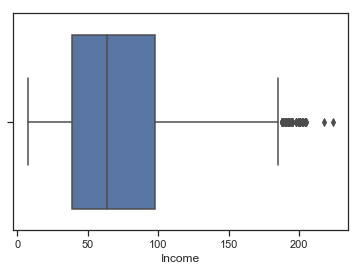

In [23]:
sns.boxplot(data['Income'])

#### Findings : 75% of Customers have income < 100k. We can see right skewed distribution.

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


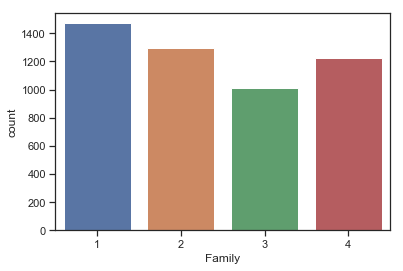

In [24]:
# Data distribution in 'Family'
print(data['Family'].value_counts())
sns.countplot(data['Family'])
plt.show()

#### Findings : More or less, all family types (size = 1 to 4) were equally targeted.

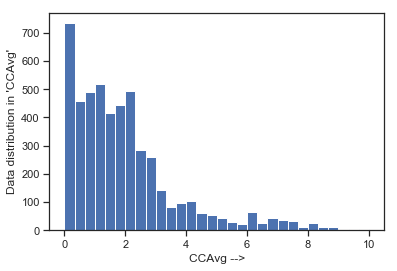

In [25]:
# Data distribution in 'CCAvg'
plt.xlabel("CCAvg -->")
plt.ylabel("Data distribution in 'CCAvg'")
plt.hist(data['CCAvg'], bins=30)
plt.show()

75% Quantile = 2.5


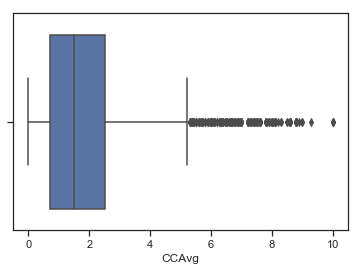

In [26]:
sns.boxplot(data['CCAvg'])
print("75% Quantile =",data['CCAvg'].quantile(0.75))
plt.show()

#### Findings : 75% of Customers have Average CCAvg of < 2.5k. From boxplot we can see there are many outliers.

1    2096
3    1501
2    1403
Name: Education, dtype: int64


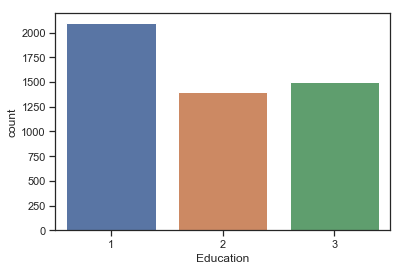

In [27]:
# Data distribution in 'Education'
print(data['Education'].value_counts())
sns.countplot(data['Education'])
plt.show()

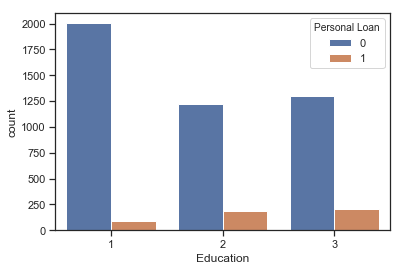

In [28]:
# Data distribution in 'Education'
sns.countplot(data['Education'],hue=data['Personal Loan'])
plt.show()

#### Findings : There are 2096 Undergraduates, 1501 Graduates & 1403 customers with Advanced/Proffessional Education. The ratio of loan not taken to loan taken is higher with Customers having Advanced/Proffessional Education.

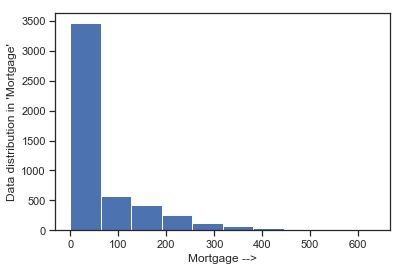

In [29]:
# Data distribution in 'Mortgage'
plt.xlabel("Mortgage -->")
plt.ylabel("Data distribution in 'Mortgage'")
plt.hist(data['Mortgage'])
plt.show()

75% Quantile = 101.0


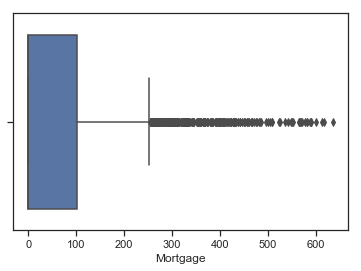

In [30]:
sns.boxplot(data['Mortgage'])
print("75% Quantile =",data['Mortgage'].quantile(0.75))
plt.show()

#### Findings : 75% of customers have Mortgage of less than 101k

0    4478
1     522
Name: Securities Account, dtype: int64


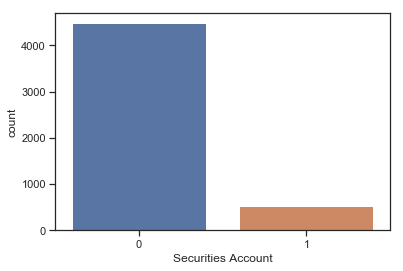

In [31]:
# Data distribution in 'Securities Account'
print(data['Securities Account'].value_counts())
sns.countplot(data['Securities Account'])
plt.show()

#### Findings : Only around 10% of the customers have Securities Account

0    4698
1     302
Name: CD Account, dtype: int64


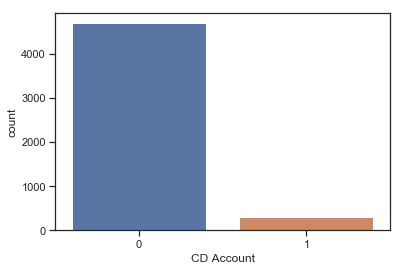

In [32]:
# Data distribution in 'CDAccount'
print(data['CD Account'].value_counts())
sns.countplot(data['CD Account'])
plt.show()

#### Findings : Only 6% of the customers have CD Account.

1    2984
0    2016
Name: Online, dtype: int64


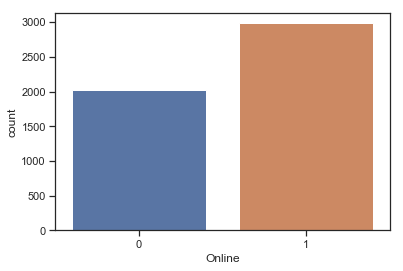

In [33]:
# Data distribution in 'Online'
print(data['Online'].value_counts())
sns.countplot(data['Online'])
plt.show()

#### Findings : Around 60% of the customers have internet banking facilities.

0    3530
1    1470
Name: CreditCard, dtype: int64


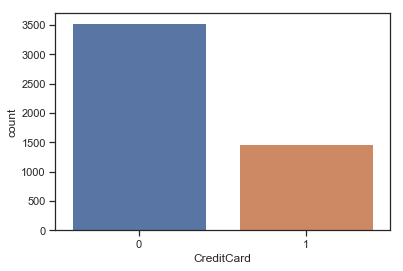

In [34]:
# Data distribution in 'CreditCard'
print(data['CreditCard'].value_counts())
sns.countplot(data['CreditCard'])
plt.show()

#### Findings : Around 30% of the customers have Credit Card.

0    4520
1     480
Name: Personal Loan, dtype: int64


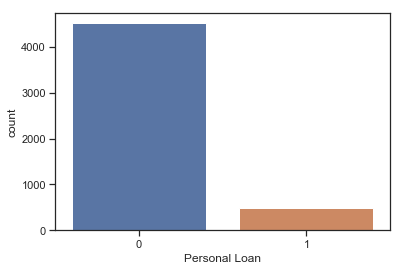

In [35]:
# Data distribution in 'CreditCard'
print(data['Personal Loan'].value_counts())
sns.countplot(data['Personal Loan'])
plt.show()

#### Findings : Only 10% of the customers have responded to loan.

### Target column distribution.

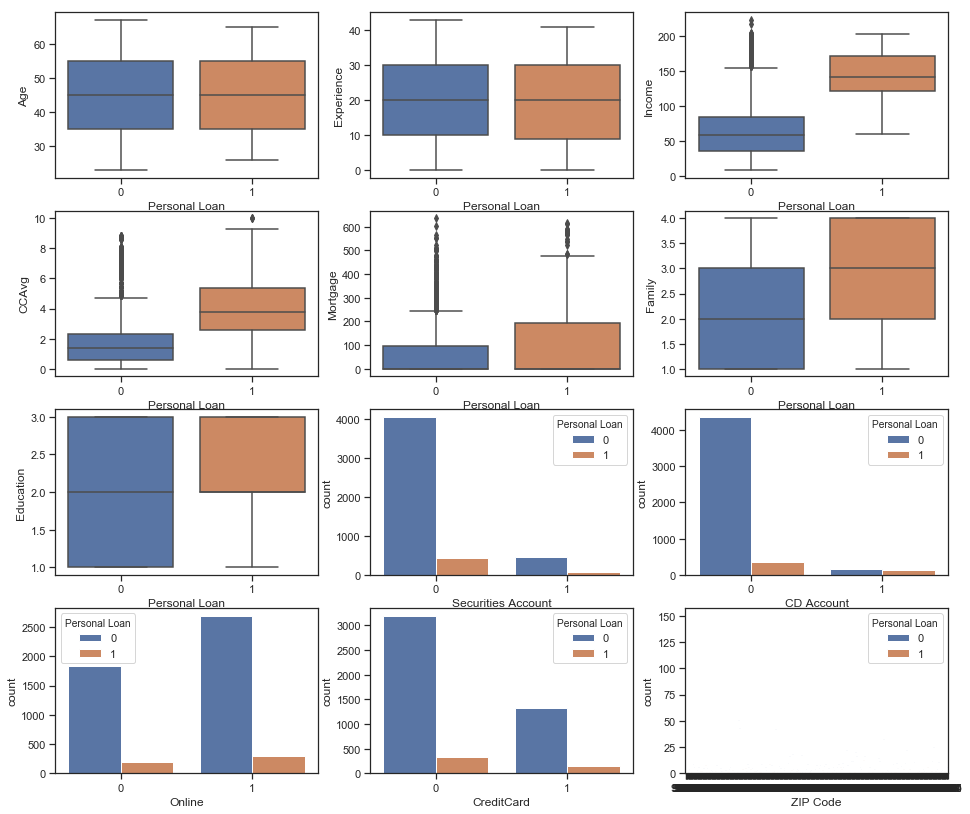

In [36]:
# Bi-variate analysis 
f, axes = plt.subplots(4, 3,figsize=(16,14))
sns.boxplot( y= 'Age',x='Personal Loan', data=data,  orient='v',ax=axes[0,0])
sns.boxplot( y= 'Experience',x='Personal Loan', data=data,  orient='v',ax=axes[0,1])
sns.boxplot( y= 'Income',x='Personal Loan', data=data,  orient='v',ax=axes[0,2])
sns.boxplot( y= 'CCAvg',x='Personal Loan', data=data,  orient='v',ax=axes[1,0])
sns.boxplot( y= 'Mortgage',x='Personal Loan', data=data,  orient='v',ax=axes[1,1])
sns.boxplot( y= 'Family',x='Personal Loan', data=data,  orient='v',ax=axes[1,2])
sns.boxplot( y= 'Education',x='Personal Loan', data=data,  orient='v',ax=axes[2,0])
sns.countplot(data['Securities Account'],hue=data['Personal Loan'],ax=axes[2,1])
sns.countplot(data['CD Account'],hue=data['Personal Loan'],ax=axes[2,2])
sns.countplot(data['Online'],hue=data['Personal Loan'],ax=axes[3,0])
sns.countplot(data['CreditCard'],hue=data['Personal Loan'],ax=axes[3,1])
sns.countplot(data['ZIP Code'],hue=data['Personal Loan'],ax=axes[3,2])
plt.show()

#### Findings :

**Age :** From the boxplot (previous step), not much of inference can be drawn from 'Age' attribute. People of all age-group responded/not responded to the loan campaign. 

**Experience :** Experience attribute also doesn't explain responsive to loan campaign. And, it is strongly correlated to 'Age' & can be dropped from model prediction.

**Income :** Customers with higher 'Income' have responded well to loan campaign. Higher the 'Income', higher the chances of positive response.

**ZIP Code :** Chances of responding to loan campaign is almost similar among customers from different zip codes.
   
**Family :** Customers with Family size>2 have responded positively to loan campaign(Around 75%).

**CCAvg :** Customers with higher credit card spending (specially CCAvg>3k) have responded positively.

**Education :** Chances of responding positively to loan campaign is higher with customers with Education level >=2.

**Mortgage :** Mortgage doesn't explain the responsiveness to loan campaign.

**Securities Account :** Chances of responding to loan campaign is almost similar among customers with/without Securities Account.

**CD Account :** Customers with CD Account have very well responded to loan campaign.

**Online :** Chances of responding to loan campaign is almost similar among customers with/without Internet Banking Facilities.

**CreditCard :** Chances of responding to loan campaign is almost similar among customers with/without CreditCard.

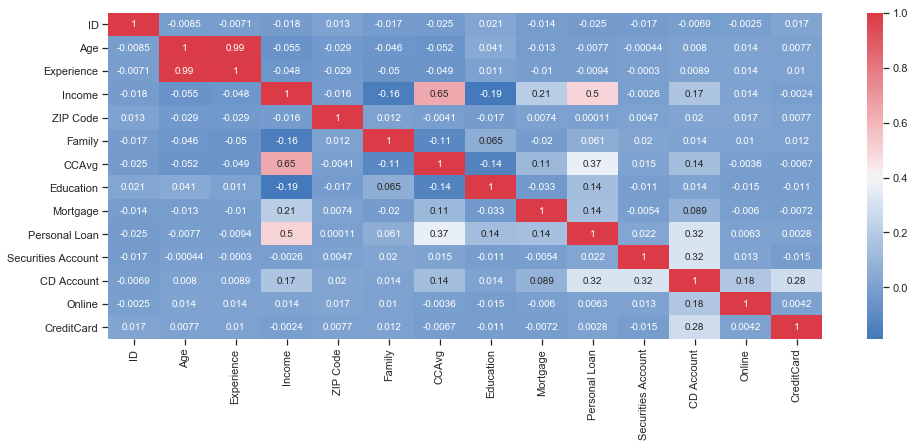

In [37]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.subplots(1,1,figsize=(16,6))

sns.heatmap(data.corr(),cmap = cmap,annot=True)
plt.show()

##### Age & Experience are strongly correlated, hence one of them can be removed from model building. We will remove experience here.
##### We will remove ID also.

In [38]:
data.drop(['Experience','ID'],inplace=True,axis=1) #drop columns

In [39]:
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [40]:
data['ZIP Code']=data['ZIP Code'].astype(str) # change data type
data['ZIP Code'].dtypes

dtype('O')

In [41]:
data['ZIP Code']=data['ZIP Code'].str[0:3] # Zip code grouped using first 3 digits
data['ZIP Code'].nunique()

57

In [42]:
data['ZIP Code']=data['ZIP Code'].str[0:2]
# Zip code grouped using first 2 digits as 57 category are not ok
data['ZIP Code'].nunique() # unique category check

7

In [43]:
data['ZIP Code'].value_counts() # distribution of different zip codes

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: ZIP Code, dtype: int64

In [44]:
data['ZIP Code']=data['ZIP Code'].astype('category')

In [45]:
data.dtypes # check for change

Age                      int64
Income                   int64
ZIP Code              category
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

###### Use stats model of logistic regression classifier to identify critical parameter. We will drop some of variables & build the model which is more robust with less number of independent variable.

In [46]:
data['Intercept']=1 # added intercept columns
X=data.drop(['Personal Loan'],axis=1) # predictor channel
y=data['Personal Loan'] # dependent variable

In [47]:
X.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Intercept'],
      dtype='object')

In [48]:
X=pd.get_dummies(X)  # One hot coding for Zip code

In [49]:
X.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Intercept',
       'ZIP Code_90', 'ZIP Code_91', 'ZIP Code_92', 'ZIP Code_93',
       'ZIP Code_94', 'ZIP Code_95', 'ZIP Code_96'],
      dtype='object')

In [50]:
import statsmodels.api as sm # import stat model
logit_model=sm.Logit(y,X) 
result=logit_model.fit()# fit logistic model
print(result.summary())# summary of results

Optimization terminated successfully.
         Current function value: 0.128243
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4983
Method:                           MLE   Df Model:                           16
Date:                Sun, 03 Nov 2019   Pseudo R-squ.:                  0.5944
Time:                        21:49:06   Log-Likelihood:                -641.21
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0099      0.007      1.521      0.128      -0.003       0.023
Incom

C:\Users\veeresh\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\veeresh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\veeresh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\veeresh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [51]:
X=X.drop(['Age','Mortgage','ZIP Code_90', 'ZIP Code_91', 'ZIP Code_92', 'ZIP Code_93',
       'ZIP Code_94', 'ZIP Code_95', 'ZIP Code_96'],axis=1)# drop perdicter channels as above
X.dtypes # chech for removal

Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Intercept               int64
dtype: object

In [52]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.128862
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 Nov 2019   Pseudo R-squ.:                  0.5925
Time:                        21:49:06   Log-Likelihood:                -644.31
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Income                 0.0547      0.003     21.133      0.000       0.050       0.060
Famil

# Logistic regression Classifier

In [53]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [54]:
X.pop('Intercept') # drop the Intercept column
X.head() # check columns for removal (predictor variables)

,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,1,0,0,0
1,34,3,1.5,1,1,0,0,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,1


In [55]:
y.head() # Target variable

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) # split data

In [57]:
log_reg_model=LogisticRegression() #(penalty='none',solver='newton-cg',random_state=1,class_weight='none') #set parameter
log_reg_model.fit(X_train,y_train) # fit model
y_train_predict=log_reg_model.predict(X_train) # predict train variable

print('=============Logistic Regression Prediction Model===========')
print('Accuracy of Train set : %0.3f'%(log_reg_model.score(X_train,y_train))) # score and print train set
y_test_predict=log_reg_model.predict(X_test) #predict test set
print('Accuracy of Test set : %0.3f'%(log_reg_model.score(X_test,y_test))) # score and print  test set

print('\n====Confusion matrix_Train Data====\n\n',confusion_matrix(y_train,y_train_predict)) # train confusion matrix
print('\n====Confusion matrix_Test Data====\n\n',confusion_matrix(y_test,y_test_predict))  # test confusion matrix

print ('\n====Classification report - Train set=====\n')
print(classification_report(y_train,y_train_predict)) # print classification reprot for train set

print ('\n=====Classification report - Test set====\n')
print(classification_report(y_test,y_test_predict)) # print classificatin
p_test,r_test,f_test,s_test=precision_recall_fscore_support(y_test,y_test_predict,labels=[1])

=============Logistic Regression Prediction Model===========
Accuracy of Train set : 0.951
Accuracy of Test set : 0.947

====Confusion matrix_Train Data====

 [[3133   36]
 [ 135  196]]

====Confusion matrix_Test Data====

 [[1340   11]
 [  69   80]]

====Classification report - Train set=====

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3169
           1       0.84      0.59      0.70       331

   micro avg       0.95      0.95      0.95      3500
   macro avg       0.90      0.79      0.83      3500
weighted avg       0.95      0.95      0.95      3500


=====Classification report - Test set====

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.88      0.54      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.92      0.76      0.82      1500
weighted avg       0.94      0.95      0.94      1500



C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train) # fit the model
y_train_predict_nb=nb_model.predict(X_train) # predict train set

print('=============Naive Bayes Classifier===========\n')
print ('Accuracy of Train set : %0.3f'%nb_model.score(X_train,y_train)) # score train set
print ('Accuracy of Test set : %0.3f\n'%nb_model.score(X_test,y_test)) # score test set
y_test_predict_nb=nb_model.predict(X_test) # predict test set

print('\n====Confusion matrix_Train Data====\n\n',confusion_matrix(y_train,y_train_predict_nb)) # train confusion matrix
print('\n====Confusion matrix_Test Data====\n\n',confusion_matrix(y_test,y_test_predict_nb))  # test confusion matrix

print ('====Classification report - Train set====\n')
print(classification_report(y_train,y_train_predict_nb)) # Classification report train data

print ('====Classification report - Test set====\n')
print(classification_report(y_test,y_test_predict_nb)) # Classification report test data
p_test_nb,r_test_nb,f_test_nb,s_test_nb=precision_recall_fscore_support(y_test,y_test_predict_nb,labels=[1])
print(f_test_nb)

=============Naive Bayes Classifier===========

Accuracy of Train set : 0.894
Accuracy of Test set : 0.887


====Confusion matrix_Train Data====

 [[2937  232]
 [ 138  193]]

====Confusion matrix_Test Data====

 [[1248  103]
 [  67   82]]
====Classification report - Train set====

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3169
           1       0.45      0.58      0.51       331

   micro avg       0.89      0.89      0.89      3500
   macro avg       0.70      0.75      0.73      3500
weighted avg       0.91      0.89      0.90      3500

====Classification report - Test set====

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1351
           1       0.44      0.55      0.49       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.74      0.71      1500
weighted avg       0.90      0.89      0.89      1500

[0.49101796]


# KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train) # scale and transform train data
X_test_scaled=sc.fit_transform(X_test) # scale and transform test data

C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
recall_train=[]
recall_test=[]
diff_recall=[]
fs_train=[]
fs_test=[]
diff_fs=[]
i=0
for j in range(1,50,2):     
    model_Knn=KNeighborsClassifier(n_neighbors=j,p=2)
    model_Knn.fit(X_train_scaled,y_train)
    y_train_predict_knn=model_Knn.predict(X_train_scaled)
    y_test_predict_knn=model_Knn.predict(X_test_scaled)
    p_train_knn,r_train_knn,f_train_knn,s_strain_knn=precision_recall_fscore_support(y_train,y_train_predict_knn,labels=[1])
    p_test_knn,r_test_knn,f_test_knn,s_test_knn=precision_recall_fscore_support(y_test,y_test_predict_knn,labels=[1])
    recall_train.append(r_train_knn[0])
    recall_test.append(r_test_knn[0])
    diff_recall.append(r_train_knn[0]-r_test_knn[0])
    fs_train.append(f_train_knn[0])
    fs_test.append(f_test_knn[0])
    diff_fs.append(f_train_knn[0]-f_test_knn[0])
    i=i+1
    


Text(0.5, 1.0, 'Optimized parameter for KNN Classifier')

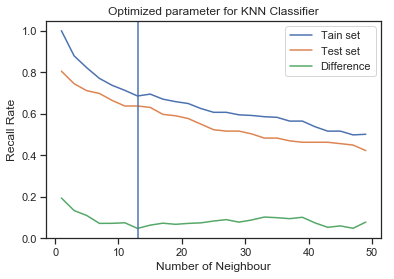

In [63]:
fig, ax = plt.subplots()
sns.lineplot(x=range(1,50,2),y=recall_train,label='Tain set')
sns.lineplot(x=range(1,50,2),y=recall_test,label='Test set')
sns.lineplot(x=range(1,50,2),y=diff_recall,label='Difference')
plt.axvline(x = 13)
ax.set_xlabel('Number of Neighbour')
ax.set_ylabel('Recall Rate')
ax.set_title('Optimized parameter for KNN Classifier')

Text(0.5, 1.0, 'Optimized parameter for KNN Classifier')

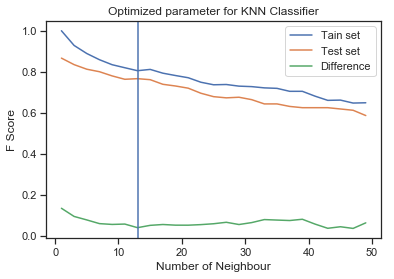

In [64]:
fig, ax = plt.subplots()
sns.lineplot(x=range(1,50,2),y=fs_train,label='Tain set')
sns.lineplot(x=range(1,50,2),y=fs_test,label='Test set')
sns.lineplot(x=range(1,50,2),y=diff_fs,label='Difference')
plt.axvline(x = 13)
ax.set_xlabel('Number of Neighbour')
ax.set_ylabel('F Score')
ax.set_title('Optimized parameter for KNN Classifier')

=>Optimized setting for K mean classifier is  n=13 which give a minimum recall difference(5%) between train and test sets at the same time resonably acceptable level accuracy of 64% for test data.Same setting hold for F score also.

In [65]:
model_Knn=KNeighborsClassifier(n_neighbors=13,p=2)
model_Knn.fit(X_train_scaled,y_train)
y_train_predict_knn=model_Knn.predict(X_train_scaled)
y_test_predict_knn=model_Knn.predict(X_test_scaled)

print('=============KNN Classifier===========\n')
print ('Accuracy of Train set : %0.3f'%model_Knn.score(X_train_scaled,y_train)) #train accuracy
print ('Accuracy of Test set : %0.3f'%model_Knn.score(X_test_scaled,y_test)) #test accuracy

print('\n====Confusion matrix_Train Data====\n\n',confusion_matrix(y_train,y_train_predict_knn)) # train confusion matrix
print('\n====Confusion matrix_Test Data====\n\n',confusion_matrix(y_test,y_test_predict_knn))  # test confusion matrix

print ('\n====Classification report - Train set====\n')
print(classification_report(y_train,y_train_predict_knn)) # train classification report

print ('\n====Classification report - Test set====\n')
print(classification_report(y_test,y_test_predict_knn)) # test classification report
p_test_knn,r_test_knn,f_test_knn,s_test_knn=precision_recall_fscore_support(y_test,y_test_predict_knn,labels=[1])

=============KNN Classifier===========

Accuracy of Train set : 0.969
Accuracy of Test set : 0.961

====Confusion matrix_Train Data====

 [[3163    6]
 [ 104  227]]

====Confusion matrix_Test Data====

 [[1347    4]
 [  54   95]]

====Classification report - Train set====

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3169
           1       0.97      0.69      0.80       331

   micro avg       0.97      0.97      0.97      3500
   macro avg       0.97      0.84      0.89      3500
weighted avg       0.97      0.97      0.97      3500


====Classification report - Test set====

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.96      0.64      0.77       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.96      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [66]:
# Comparision of ther perfromance of all the three models
print('++++Recall score_Class 1++++\nLogistic regression \t\t: %0.2f\nNaive Bayes \t\t\t: %0.2f\nKNN Classifier \t\t\t: %0.2f'%(r_test,r_test_nb,r_test_knn))
print('\n++++Precision score_Class 1++++\nLogistic regression \t\t: %0.2f\nNaive Bayes \t\t\t: %0.2f\nKNN Classifier \t\t\t: %0.2f'%(p_test,p_test_nb,p_test_knn))
print('\n++++F score_Class 1++++\nLogistic regression \t\t: %0.2f\nNaive Bayes \t\t\t: %0.2f\nKNN Classifier \t\t\t: %0.2f'%(f_test,f_test_nb,f_test_knn))

++++Recall score_Class 1++++
Logistic regression 		: 0.54
Naive Bayes 			: 0.55
KNN Classifier 			: 0.64

++++Precision score_Class 1++++
Logistic regression 		: 0.88
Naive Bayes 			: 0.44
KNN Classifier 			: 0.96

++++F score_Class 1++++
Logistic regression 		: 0.67
Naive Bayes 			: 0.49
KNN Classifier 			: 0.77


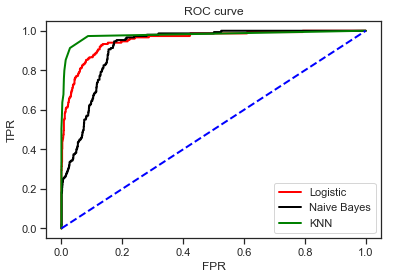

AUC for Logistic Regression model : 0.954
AUC for Naive Bayes model : 0.920
AUC for KNN model : 0.979


In [67]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
##Computing false and true positive rates
y_test_predict_prob=log_reg_model.predict_proba(X_test)
fpr, tpr,thres=roc_curve(y_test,y_test_predict_prob[:,1],drop_intermediate=False)
y_test_predict_nb_prob=nb_model.predict_proba(X_test)
fpr_nb, tpr_nb,thres_nb=roc_curve(y_test,y_test_predict_nb_prob[:,1],drop_intermediate=False)
y_test_predict_knn_prob=model_Knn.predict_proba(X_test_scaled)
fpr_knn, tpr_knn,threshold_knn=roc_curve(y_test,y_test_predict_knn_prob[:,1],drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='Logistic')
plt.plot(fpr_nb, tpr_nb, color='black',
 lw=2, label='Naive Bayes')
plt.plot(fpr_knn, tpr_knn, color='green',
 lw=2, label='KNN')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()
auc = roc_auc_score(y_test,y_test_predict_prob[:,1])
print('AUC for Logistic Regression model : %.3f' % auc)
auc = roc_auc_score(y_test,y_test_predict_nb_prob[:,1])
print('AUC for Naive Bayes model : %.3f' % auc)
auc = roc_auc_score(y_test,y_test_predict_knn_prob[:,1])
print('AUC for KNN model : %.3f' % auc)